# Cell type neighborhood gallery

In this notebook, we will visualize a set of cell type neighborhoods to produce visualizations similar to Figure 2 of [Yao et al](https://doi.org/10.1101/2023.03.06.531121).


In [1]:
import os
import pandas as pd
import numpy as np
import time
import json
import matplotlib.pyplot as plt
import requests
import pathlib

The prerequisite for running this notebook is that the data have been downloaded to local directory maintaining the organization from the manifest.json. **Change the download_base variable to where you have downloaded the data in your system.**

In [2]:
download_base = 'https://allen-brain-cell-atlas.s3-us-west-2.amazonaws.com'

url = 'https://allen-brain-cell-atlas.s3-us-west-2.amazonaws.com/releases/20230630/manifest.json'
manifest = json.loads(requests.get(url).text)

Read in the list of neighborhood spatial embedding maps

In [3]:
metadata = manifest['file_listing']['WMB-neighborhoods']['metadata']
rpath = metadata['dimension_reduction']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
maps = pd.read_csv(file)
maps.set_index('name',inplace=True)
print("number of maps:",len(maps))
maps

number of maps: 18


,label,description,number_of_cells,cluster_group_label
name,,,,
CNU-HYa-GABA,UMAP20230507-CNU-HYa-GABA,The hypothalamus and extended amygdala (HY-EA)...,77186,CCN20230504_CNU-HYa-GABA
HY-GABA,UMAP20230507-HY-GABA,The hypothalamus and extended amygdala (HY-EA)...,90331,CCN20230504_HY-GABA
HY-EA-Glut,UMAP20230507-HY-EA-Glut,The hypothalamus and extended amygdala (HY-EA)...,126678,CCN20230504_HY-EA-Glut
HY-EA,UMAP20230507-HY-EA,The hypothalamus and extended amygdala (HY-EA)...,294195,CCN20230504_HY-EA
Pallium-Glut,UMAP20230507-Pallium-Glut,Glutamatergic neurons from isocortex and hippo...,1494964,CCN20230504_Pallium-Glut
NP-CT-L6b-Glut,UMAP20230507-NP-CT-L6b-Glut,"Glutamatergic, NP, CT, and L6b neurons in isoc...",311327,CCN20230504_NP-CT-L6b-Glut
IT-ET-Glut,UMAP20230507-IT-ET-Glut,"Glutamatergic, IT and ET neurons in isocortex",1098949,CCN20230504_IT-ET-Glut
NN-IMN-GC,UMAP20230507-NN-IMN-GC,"Non-neuronal cells, immature neurons, dentate ...",1428872,CCN20230504_NN-IMN-GC
Subpallium-GABA,UMAP20230507-Subpallium-GABA,Telencephalic GABAergic neurons. Neighborhood ...,615417,CCN20230504_Subpallium-GABA


Read in the extended 10x and MERFISH cell metadata created in the cluster neighborhood tutorial

In [4]:
metadata = manifest['file_listing']['WMB-neighborhoods']['metadata']
rpath = metadata['10x_cell_metadata_with_group_membership']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
cell_10x = pd.read_csv(file,dtype={"neurotransmitter":str})
cell_10x.set_index('cell_label',inplace=True)
print("number of 10x cells:",len(cell_10x))

number of 10x cells: 4057701


In [5]:
metadata = manifest['file_listing']['WMB-neighborhoods']['metadata']
rpath = metadata['merfish_cell_metadata_with_group_membership']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
cell_merfish = pd.read_csv(file,dtype={"cell_label":str,"neurotransmitter":str})
cell_merfish.set_index('cell_label',inplace=True)
print("number of merfish cells:",len(cell_merfish))

number of merfish cells: 4330907


Create a set of helper functions to read in the neighborhood specific UMAP coordinates and to plot cells in a UMAP or anatomical context and apply them a set of neighborhood

In [6]:
def fetch_coord( group ) :
    mlabel = maps.loc[group,'label']
    metadata = manifest['file_listing']['WMB-neighborhoods']['metadata']
    rpath = metadata[mlabel]['files']['csv']['relative_path']
    file = os.path.join( download_base, rpath)
    coord = pd.read_csv(file)
    coord.set_index('cell_label',inplace=True)
    return coord

In [7]:
def plot_umap( xx, yy, cc=None, val=None, fig_width = 8, fig_height = 8, cmap=None ) :
    
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)
    
    if cmap is not None :
        plt.scatter(xx,yy,s=0.5,c=val,marker='.',cmap=cmap)
    elif cc is not None :
        plt.scatter(xx,yy,s=0.5,color=cc,marker='.')
        
    ax.axis('equal')
    ax.set_xlim(-18,27)
    ax.set_ylim(-18,27)
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax

In [8]:
def plot_sections( df, group, feature, blist, fig_width = 20, fig_height = 5) :
    
    fig, ax = plt.subplots(1,len(blist))
    fig.set_size_inches(fig_width, fig_height)
    
    for idx,bsl in enumerate(blist) :
        
        filtered = df[df['brain_section_label'] == bsl]
        xx = filtered['x']
        yy = filtered['y']

        vv = filtered[feature].copy()
        pred = (filtered[group] == False)
        vv[pred] = '#f5f5f5'
        
        ax[idx].scatter(xx,yy,s=1.0,color=vv,marker=".")
            
        ax[idx].axis('equal')
        ax[idx].set_xlim(0,11)
        ax[idx].set_ylim(11,0)
        ax[idx].set_xticks([])
        ax[idx].set_yticks([])
        
        ax[idx].set_title("%s: %s" % (group,bsl) )
        
        
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    plt.show()
    return fig, ax

### Neighborhood: Pallium-Glut

Figure 2 (a) and (f)

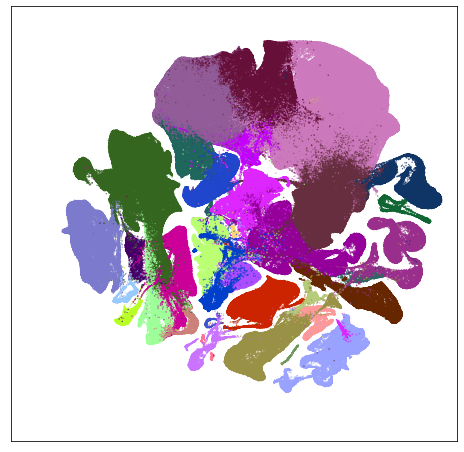

In [9]:
group = 'Pallium-Glut'
coord = fetch_coord(group)
fig, ax = plot_umap( coord['x'], coord['y'], cc=cell_10x.loc[coord.index,'subclass_color'])

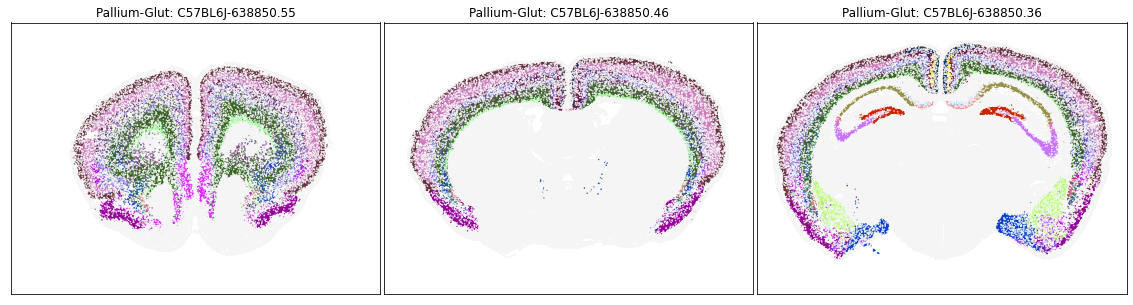

In [10]:
blist = ['C57BL6J-638850.55','C57BL6J-638850.46','C57BL6J-638850.36']
fig, ax = plot_sections( cell_merfish, group, 'subclass_color', blist )

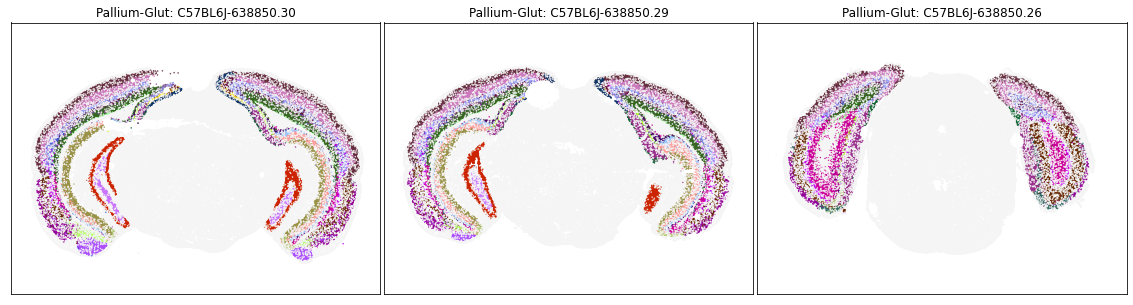

In [11]:
blist = ['C57BL6J-638850.30','C57BL6J-638850.29','C57BL6J-638850.26']
fig, ax = plot_sections( cell_merfish, group, 'subclass_color', blist )

### Neighborhood: Subpallium-GABA

Figure 2 (b) and (g)

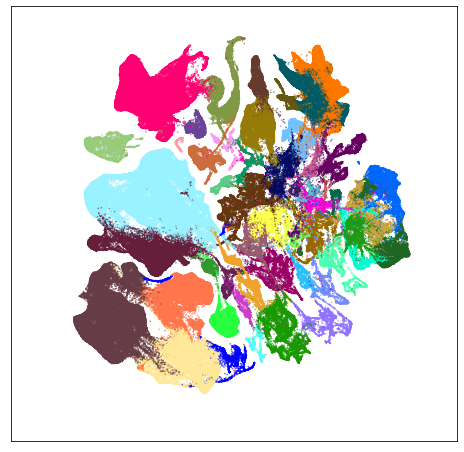

In [12]:
group = 'Subpallium-GABA'
coord = fetch_coord(group)
fig, ax = plot_umap( coord['x'], coord['y'], cc=cell_10x.loc[coord.index,'subclass_color'])

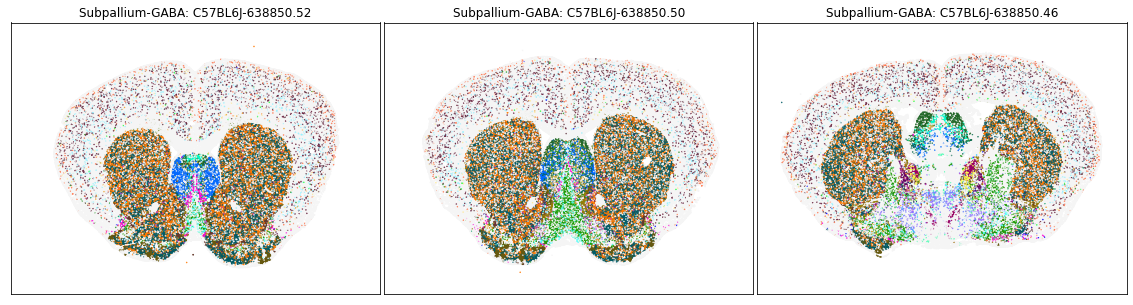

In [13]:
blist = ['C57BL6J-638850.52','C57BL6J-638850.50','C57BL6J-638850.46']
fig, ax = plot_sections( cell_merfish, group, 'subclass_color', blist )

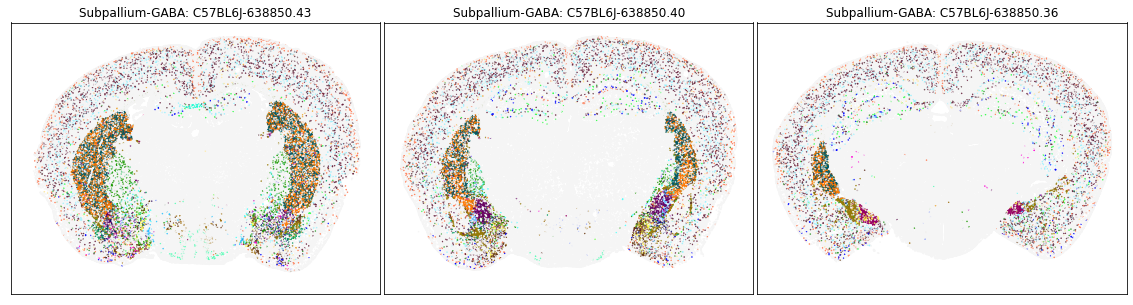

In [14]:
blist = ['C57BL6J-638850.43','C57BL6J-638850.40','C57BL6J-638850.36']
fig, ax = plot_sections( cell_merfish, group, 'subclass_color', blist )

### Neighborhood: HY-EA

Similar to Figure (c) and (f)

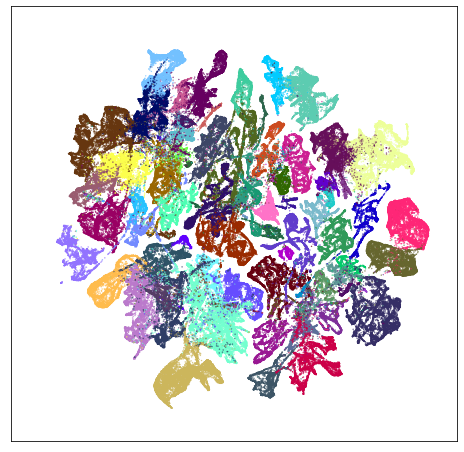

In [15]:
group = 'HY-EA'
coord = fetch_coord(group)
fig, ax = plot_umap( coord['x'], coord['y'], cc=cell_10x.loc[coord.index,'subclass_color'])

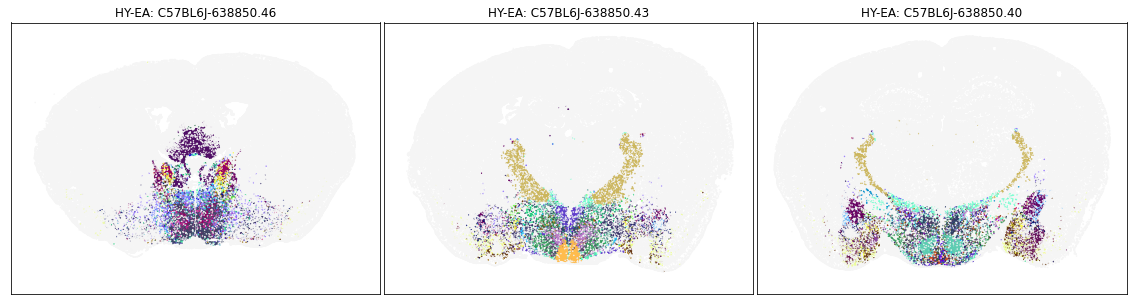

In [16]:
blist = ['C57BL6J-638850.46','C57BL6J-638850.43','C57BL6J-638850.40']
fig, ax = plot_sections( cell_merfish, group, 'subclass_color', blist )

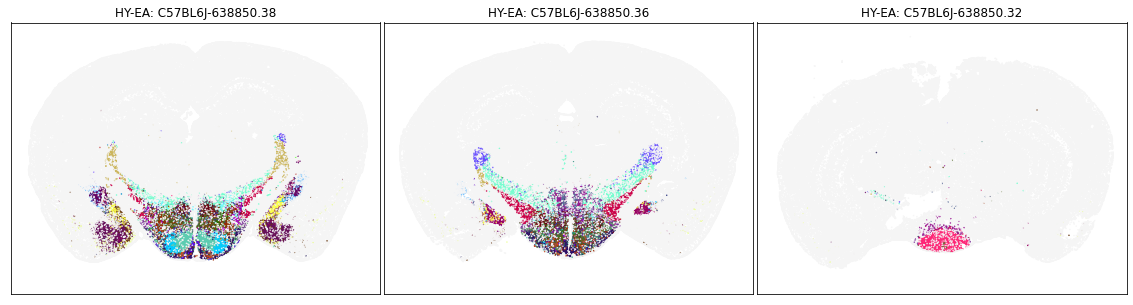

In [17]:
blist = ['C57BL6J-638850.38','C57BL6J-638850.36','C57BL6J-638850.32']
fig, ax = plot_sections( cell_merfish, group, 'subclass_color', blist )

### Neighborhood: TH-EPI-Glut

Figure 2 (d) and (i)

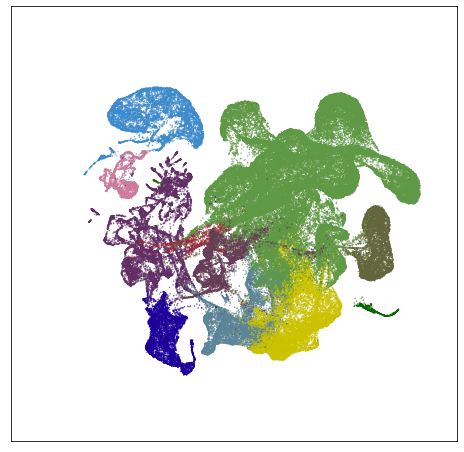

In [18]:
group = 'TH-EPI-Glut'
coord = fetch_coord(group)
fig, ax = plot_umap( coord['x'], coord['y'], cc=cell_10x.loc[coord.index,'subclass_color'])

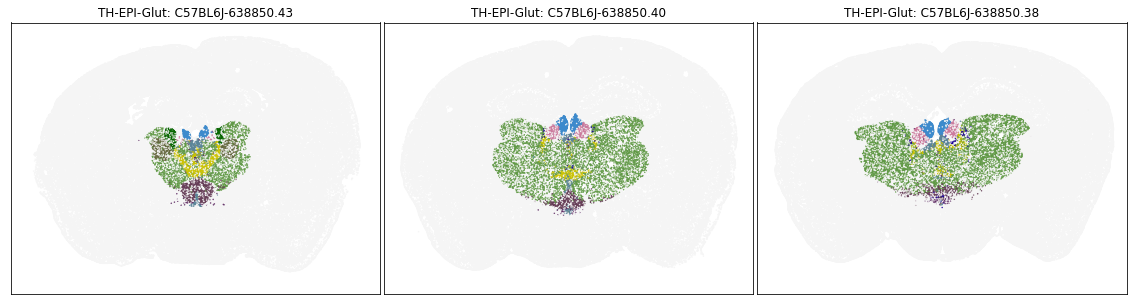

In [19]:
blist = ['C57BL6J-638850.43','C57BL6J-638850.40','C57BL6J-638850.38']
fig, ax = plot_sections( cell_merfish, group, 'subclass_color', blist )

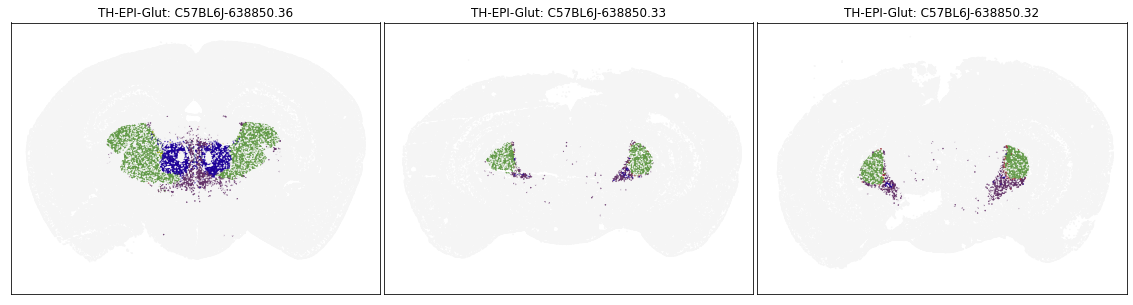

In [20]:
blist = ['C57BL6J-638850.36','C57BL6J-638850.33','C57BL6J-638850.32']
fig, ax = plot_sections( cell_merfish, group, 'subclass_color', blist )

### Neighborhood: MB-HB-CB

Figure 2 (e) and (j)

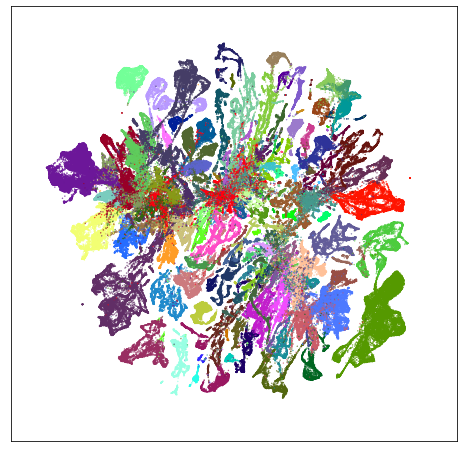

In [21]:
group = 'MB-HB-CB'
coord = fetch_coord(group)
fig, ax = plot_umap( coord['x'], coord['y'], cc=cell_10x.loc[coord.index,'subclass_color'])

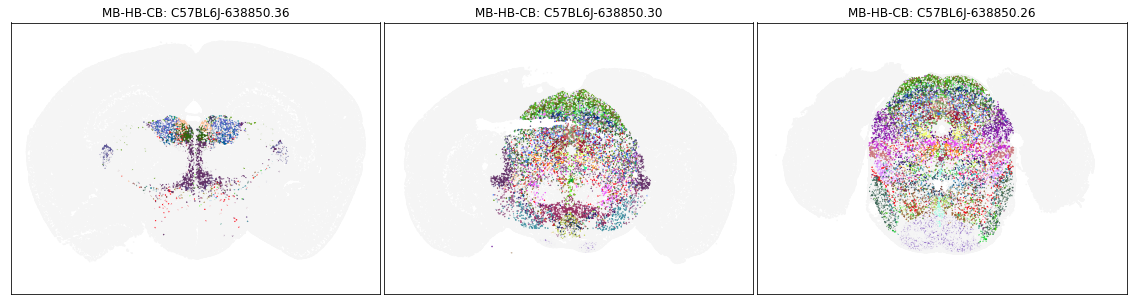

In [22]:
blist = ['C57BL6J-638850.36','C57BL6J-638850.30','C57BL6J-638850.26']
fig, ax = plot_sections( cell_merfish, group, 'subclass_color', blist )

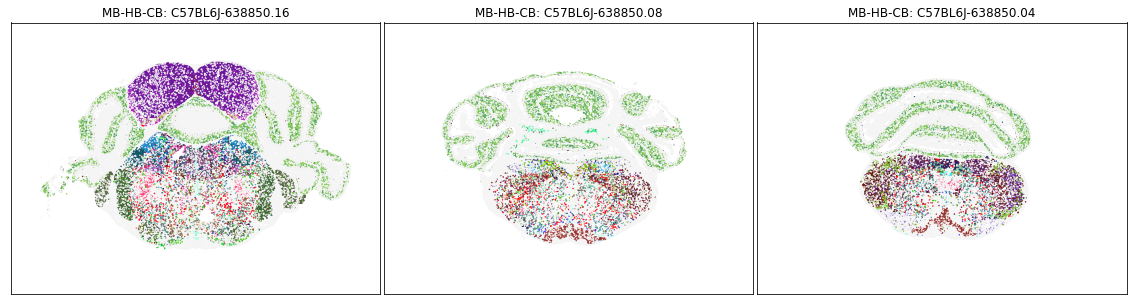

In [23]:
blist = ['C57BL6J-638850.16','C57BL6J-638850.08','C57BL6J-638850.04']
fig, ax = plot_sections( cell_merfish, group, 'subclass_color', blist )